In [2]:
#https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
train=pd.read_csv('train_2016_v2.csv',parse_dates=["transactiondate"])

In [4]:
train.shape

(90275, 3)

In [5]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


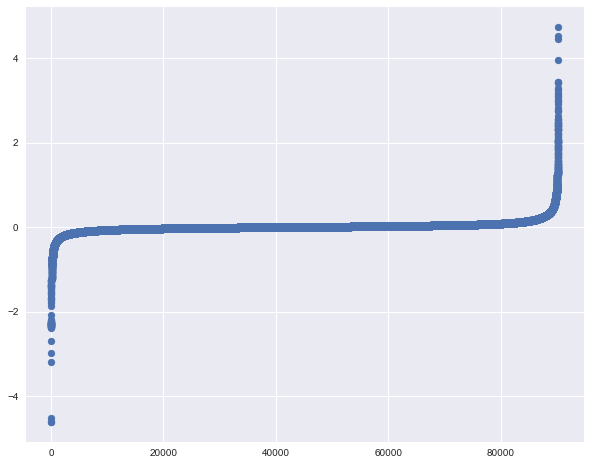

In [6]:
plt.figure(figsize=(10,8))
plt.scatter(range(train.shape[0]),np.sort(train.logerror.values))

In [7]:
ulimit=np.percentile(train.logerror,99)
llimit=np.percentile(train.logerror,1)

In [8]:
train['logerror'].loc[train['logerror']>ulimit]=ulimit
train['logerror'].loc[train['logerror']<llimit]=llimit

/Users/prabha/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


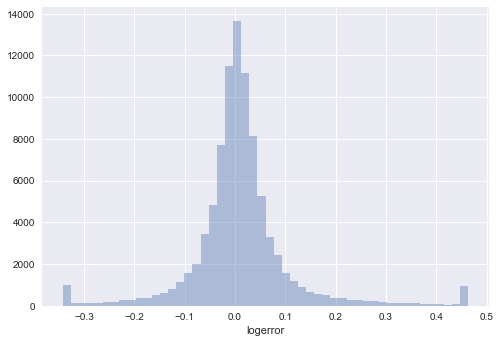

In [9]:
sns.distplot(train.logerror,bins=50,kde=False)

In [10]:
train['transactionmonth']=train.transactiondate.dt.month

In [11]:
train.dtypes

parcelid                     int64
logerror                   float64
transactiondate     datetime64[ns]
transactionmonth             int64
dtype: object

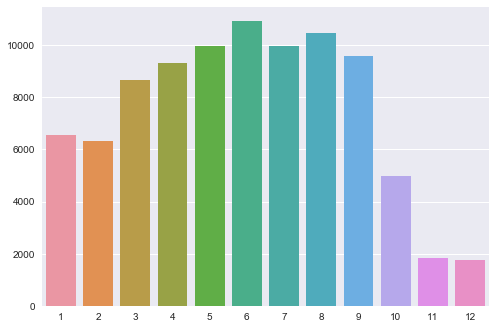

In [12]:
cnt=train['transactionmonth'].value_counts()
sns.barplot(cnt.index,cnt.values)

In [19]:
#most of the parcel ids are appearing only once
train.parcelid.value_counts().reset_index()['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [27]:
#lets explore properties_2016
prop_2016=pd.read_csv('properties_2016.csv')

/Users/prabha/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
missing_df=prop_2016.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name','missing_count']
missing_df=missing_df[missing_df.missing_count>0]

In [49]:
missing_df=missing_df.sort_values('missing_count')

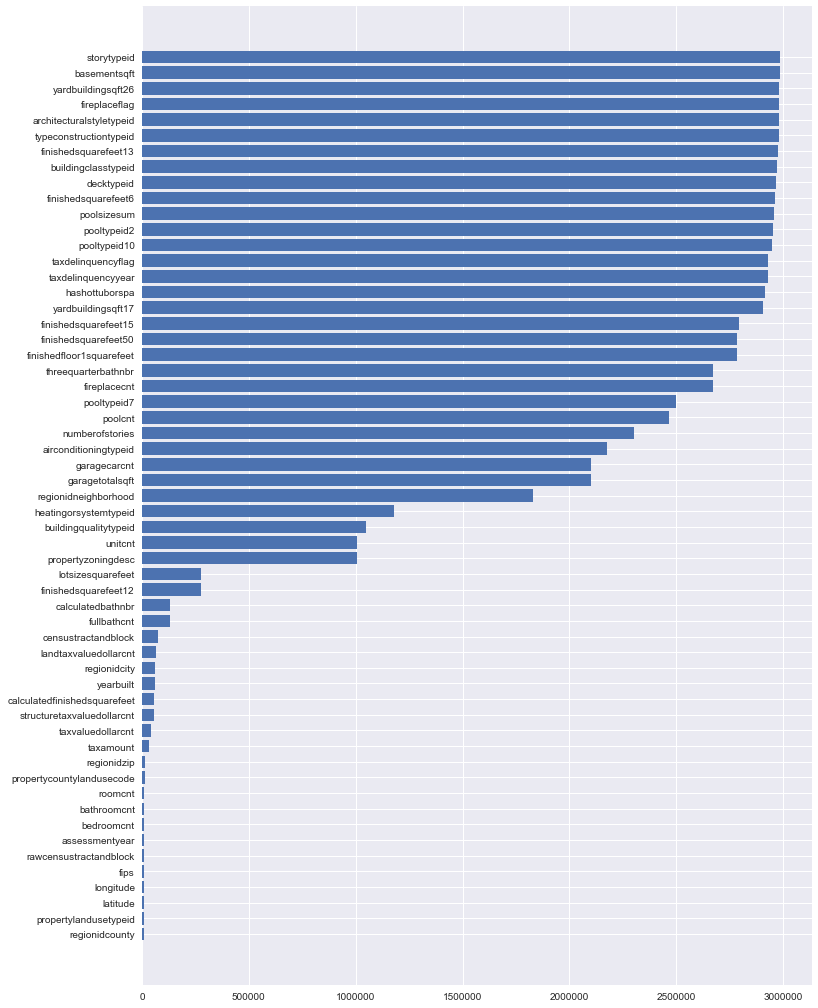

In [67]:
fig,ax=plt.subplots(figsize=(12,18))
ax.barh(range(missing_df.shape[0]),missing_df.missing_count.values)
ax.set_yticks(range(missing_df.shape[0]))
ax.set_yticklabels(missing_df.column_name)
plt.show()

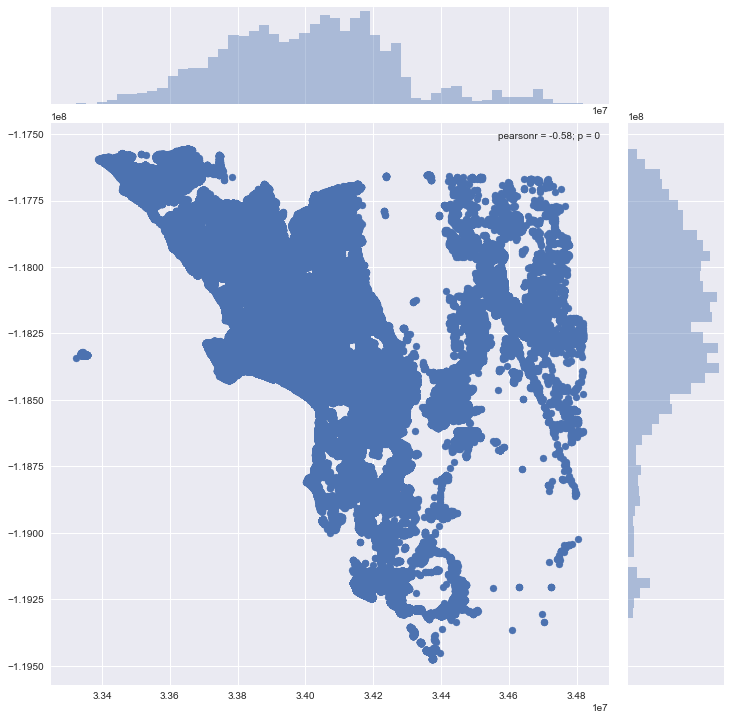

In [69]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_2016.latitude.values,y=prop_2016.longitude.values,size=10)

In [72]:
train=pd.merge(train,prop_2016,how='left',on='parcelid')

In [73]:
train.head()

,parcelid,logerror,transactiondate,transactionmonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [77]:
#check number of nulls
missing_df=train.isnull().sum().reset_index()
missing_df.columns=['column_name','missing_count']
missing_df['missing_ratio']=missing_df['missing_count']/train.shape[0]
missing_df[missing_df['missing_ratio']>.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
16,finishedsquarefeet13,90242,0.999634
44,storytypeid,90232,0.999524


In [80]:
#UNivariate Analysis
#take float variables and get the correlation with target variable
#mean_values=
mean_values=train.mean(axis=0)
train1=train.fillna(mean_values,inplace=True)

,parcelid,logerror,transactiondate,transactionmonth,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.000000,7.229885,713.581395,2.0,3.0,4.0,...,1.440739,1,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,13.402692,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,1.816372,7.229885,713.581395,3.5,4.0,4.0,...,1.440739,1,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,13.402692,6.049151e+13
2,12098116,-0.0040,2016-01-01,1,1.000000,7.229885,713.581395,3.0,2.0,4.0,...,1.440739,1,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,13.402692,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.000000,7.229885,713.581395,2.0,2.0,4.0,...,1.440739,1,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,13.402692,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,1.816372,7.229885,713.581395,2.5,4.0,4.0,...,2.000000,1,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,13.402692,6.059042e+13
5,11509835,-0.2705,2016-01-02,1,1.000000,7.229885,713.581395,4.0,4.0,4.0,...,1.440739,1,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,13.402692,6.037621e+13
6,12286022,0.0440,2016-01-02,1,1.816372,7.229885,713.581395,1.0,2.0,4.0,...,1.440739,1,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,13.402692,6.037542e+13
7,17177301,0.1638,2016-01-02,1,1.816372,7.229885,713.581395,2.5,3.0,4.0,...,2.000000,1,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,13.402692,6.111003e+13
8,14739064,-0.0030,2016-01-02,1,1.816372,7.229885,713.581395,1.0,2.0,4.0,...,1.440739,1,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,13.402692,6.059042e+13
9,14677559,0.0843,2016-01-03,1,1.816372,7.229885,713.581395,2.0,2.0,4.0,...,1.000000,1,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,13.402692,6.059063e+13


In [84]:
x_cols=[cols for cols in train1.columns if cols not in ['logerror'] if train1[cols].dtype=='float64']

In [104]:
labels=[]
values=[]
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train1[col].values,train1['logerror'].values)[0,1])
corr_df=pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df=corr_df.sort_values(by='corr_values')

/Users/prabha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/prabha/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


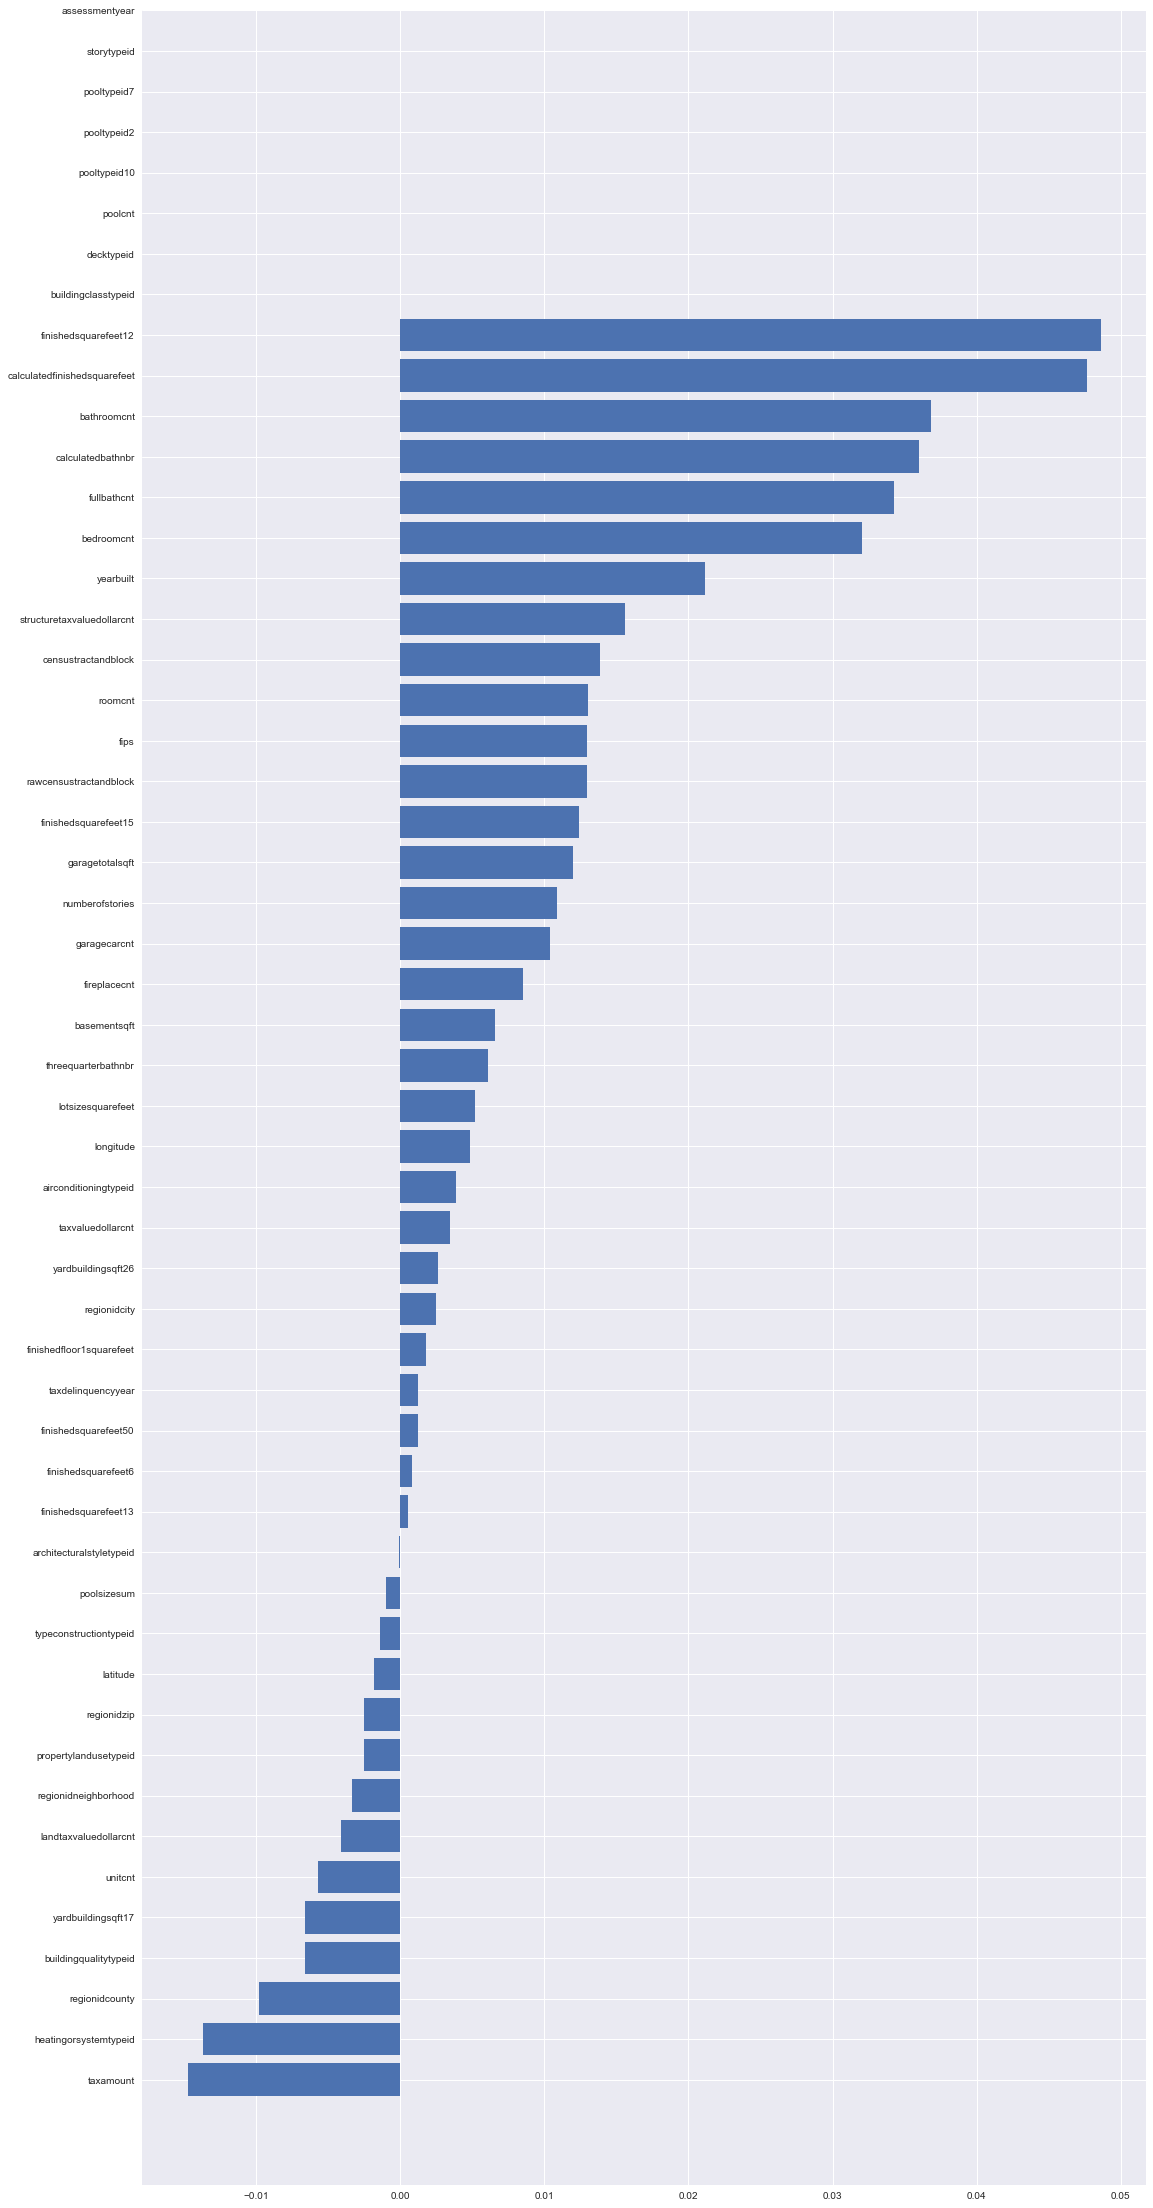

In [122]:
ind= range(corr_df.shape[0])
fig,ax=plt.subplots(figsize=(18,40))
ax.barh(ind,corr_df.corr_values.values)
ax.set_yticks(ind)
ax.set_yticklabels(corr_df['col_labels'].values)
plt.show()

In [124]:
#Below columns have no correlation becaus eit might have only one unique value , lets test this 
corr_zero_cols=['assessmentyear','storytypeid','pooltypeid7','pooltypeid2','pooltypeid2','poolcnt','decktypeid',
                'buildingclasstypeid']

In [129]:

train1[corr_zero_cols].nunique()

assessmentyear         1
storytypeid            1
pooltypeid7            1
pooltypeid2            1
pooltypeid2            1
poolcnt                1
decktypeid             1
buildingclasstypeid    1
dtype: int64